In [1]:
import os
import math
import numpy as np
import pandas as po
import matplotlib.pyplot as plt

import torch
from torch import nn
import torch.optim as optim
from torch.autograd import Variable

from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [99]:
class Hnet(nn.Module):
    def __init__(self, z_dim=2, w=400):
        super(Hnet, self).__init__()
        self.z_dim = z_dim
        input_dim = z_dim

        self.h_lin_1 = nn.Linear(input_dim, w) #
        self.h_lin_2 = nn.Linear(w, w) #
        self.h_lin_3 = nn.Linear(w, 1) #
        self.h_relu = nn.ReLU()
        self.h_tanh = nn.Tanh()
        self.h_silu = nn.SiLU()

    def h_z_basic(self, z):
        out = self.h_lin_1(z)
        out = self.h_silu(out)
        out = self.h_lin_2(out)
        out = self.h_silu(out)
        out = self.h_lin_3(out)
        return out

    def h_z(self, z):
        out = self.h_z_basic(z)
        return out

    def forward(self, z, verbose=False):
        bs = z.shape[0]

        h = self.h_z(z)
        dh = torch.autograd.grad(h, z, torch.ones_like(h), create_graph=True, retain_graph=True)[0]
        bs = z.shape[0]
        dh = dh.reshape(bs,-1)
        return dh

gamma = 100.0
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))

num_pts = 100
x = np.linspace(-2,2,num=101)
p = np.linspace(-2,2,num=101)
X, P = np.meshgrid(x,p)
Z = torch.tensor(np.transpose(np.array([X.reshape(-1,), P.reshape(-1,)])), requires_grad=True).float()
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

Text(0.5, 1.0, '$\\gamma=100$')

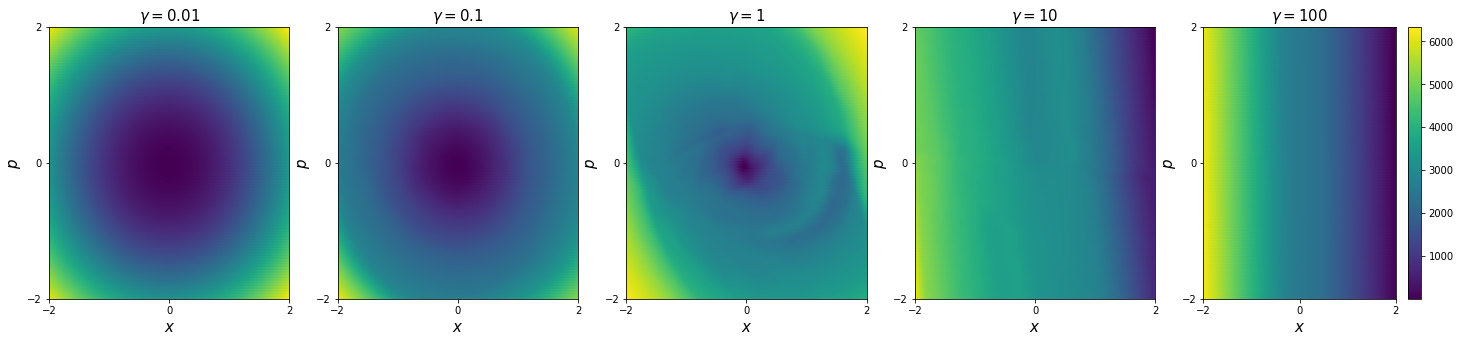

In [144]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
gamma = 0.01
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
#h_value = np.max(h_value) - h_value + 1

#plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
plt.scatter(X.reshape(-1),P.reshape(-1,), c=-h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=0.01$", fontsize=15)

plt.subplot(1,5,2)
gamma = 0.1
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 70

plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=0.1$", fontsize=15)

plt.subplot(1,5,3)
gamma = 0.5
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=1$", fontsize=15)

plt.subplot(1,5,4)
gamma = 10
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=10$", fontsize=15)

plt.subplot(1,5,5)
gamma = 100
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
#plt.colorbar()
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=100$", fontsize=15)


#plt.savefig('./1d_ho_nn.pdf',bbox_inches="tight")

Text(0.5, 0, 'Neural Network')

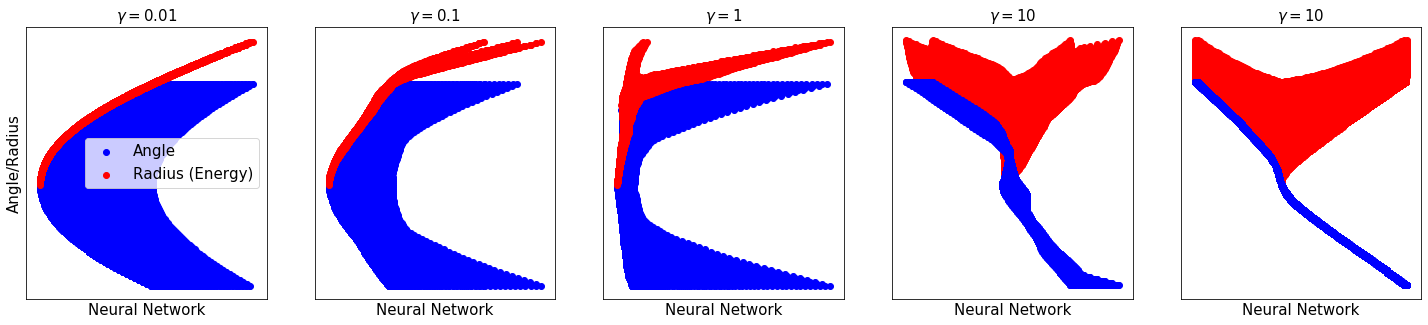

In [146]:
plt.figure(figsize=(25,5))

plt.subplot(1,5,1)
gamma = 0.01
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = -model.h_z(Z).reshape(101,101).detach().numpy()
C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.title(r"$\gamma=0.01$", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)
plt.ylabel("Angle/Radius",fontsize=15)
plt.legend(["Angle","Radius (Energy)"], fontsize=15)

plt.subplot(1,5,2)
gamma = 0.1
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 70

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.title(r"$\gamma=0.1$", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)


plt.subplot(1,5,3)
gamma = 0.5
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.title(r"$\gamma=1$", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)


plt.subplot(1,5,4)
gamma = 10
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.title(r"$\gamma=10$", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)

plt.subplot(1,5,5)
gamma = 100
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.title(r"$\gamma=10$", fontsize=15)
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)



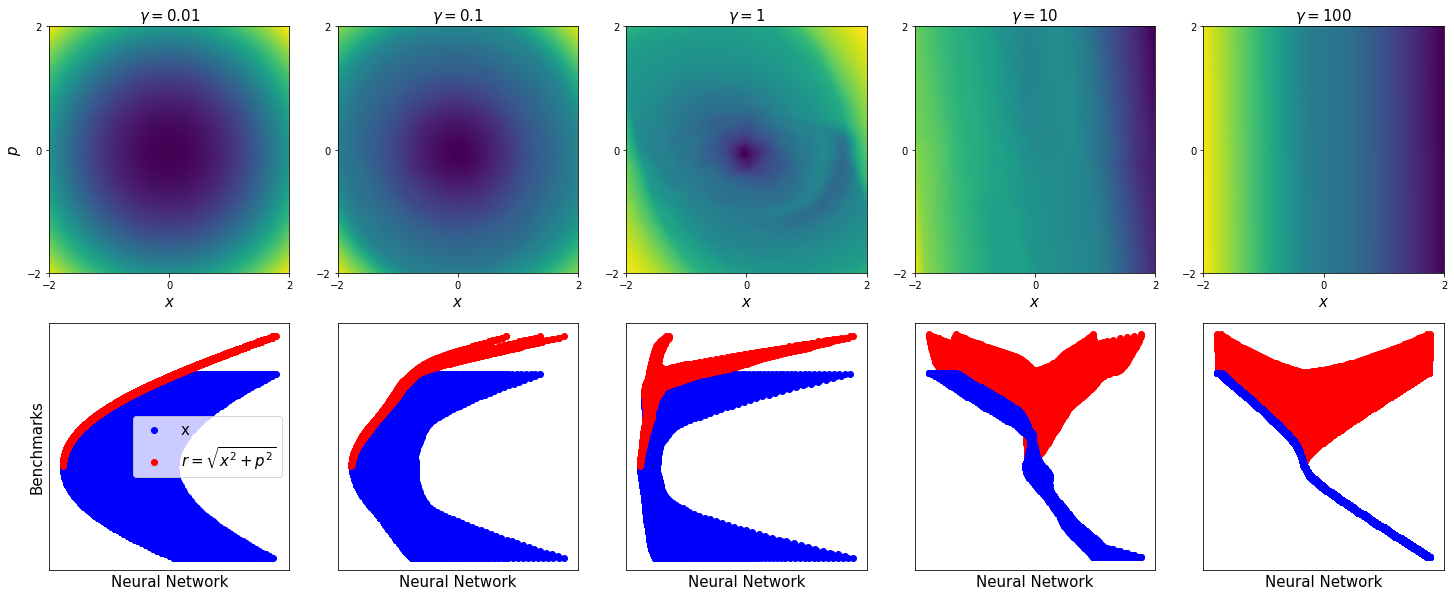

In [150]:
plt.figure(figsize=(25,10))

plt.subplot(2,5,1)
gamma = 0.01
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
#h_value = np.max(h_value) - h_value + 1

#plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
plt.scatter(X.reshape(-1),P.reshape(-1,), c=-h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.ylabel(r"$p$",fontsize=15)
plt.title(r"$\gamma=0.01$", fontsize=15)

plt.subplot(2,5,2)
gamma = 0.1
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 70

plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.title(r"$\gamma=0.1$", fontsize=15)

plt.subplot(2,5,3)
gamma = 0.5
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=np.log(h_value.reshape(-1,)))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.title(r"$\gamma=1$", fontsize=15)

plt.subplot(2,5,4)
gamma = 10
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.title(r"$\gamma=10$", fontsize=15)

plt.subplot(2,5,5)
gamma = 100
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
#plt.colorbar()
#plt.scatter(X.reshape(-1),P.reshape(-1,), c=h_value.reshape(-1,))
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xticks([-2,0,2])
plt.yticks([-2,0,2])
plt.xlabel(r"$x$",fontsize=15)
plt.title(r"$\gamma=100$", fontsize=15)


plt.subplot(2,5,6)
gamma = 0.01
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = -model.h_z(Z).reshape(101,101).detach().numpy()
C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)
plt.ylabel("Benchmarks",fontsize=15)
plt.legend(["x",r"$r=\sqrt{x^2+p^2}$"], fontsize=15)

plt.subplot(2,5,7)
gamma = 0.1
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 70

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)


plt.subplot(2,5,8)
gamma = 0.5
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)


plt.subplot(2,5,9)
gamma = 10
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)

plt.subplot(2,5,10)
gamma = 100
model = Hnet(z_dim=2, w=400)
model.load_state_dict(torch.load("./results/"+"1d_model_%.2f.pt"%gamma))
h_value = model.h_z(Z).reshape(101,101).detach().numpy()
h_value = np.max(h_value) - h_value + 1

C1 = np.sqrt(X**2+P**2)
C2 = X

plt.scatter(h_value.reshape(-1),C1.reshape(-1,), color="red")
plt.scatter(h_value.reshape(-1),C2.reshape(-1,), color="blue")
plt.xticks([])
plt.yticks([])
plt.xlabel("Neural Network",fontsize=15)

plt.savefig('./1d_ho_nn.png',bbox_inches="tight")